In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Считываем данные с файла
data = pd.read_csv('train.csv')
print('Size of train file (rows, cols): ', data.shape)
data.head()

Size of train file (rows, cols):  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Удаляем лишние поля
data.drop('Name', axis = 'columns', inplace=True)
data.drop('Ticket', axis='columns', inplace=True)
data.drop('PassengerId', axis='columns',inplace= True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
#Удаляем ненужное поле "Cabin" и заполняем пропуски соотвествующей модой
data.drop('Cabin', axis = 'columns',inplace=True)
data['Age'] = data['Age'].fillna(data['Age'].value_counts().index[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().index[0])
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

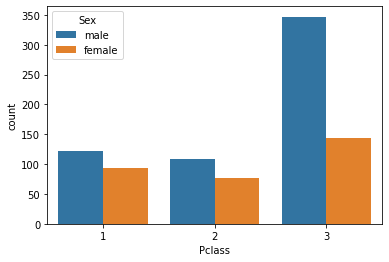

In [6]:
sns.countplot(x="Pclass", hue="Sex", data=data)
plt.show()

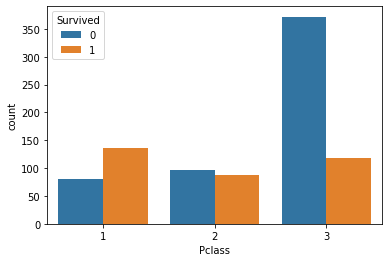

In [7]:
sns.countplot(x="Pclass", hue="Survived", data=data)
plt.show()

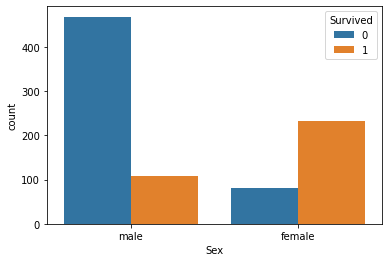

In [8]:
sns.countplot(x="Sex", hue="Survived", data=data)
plt.show()

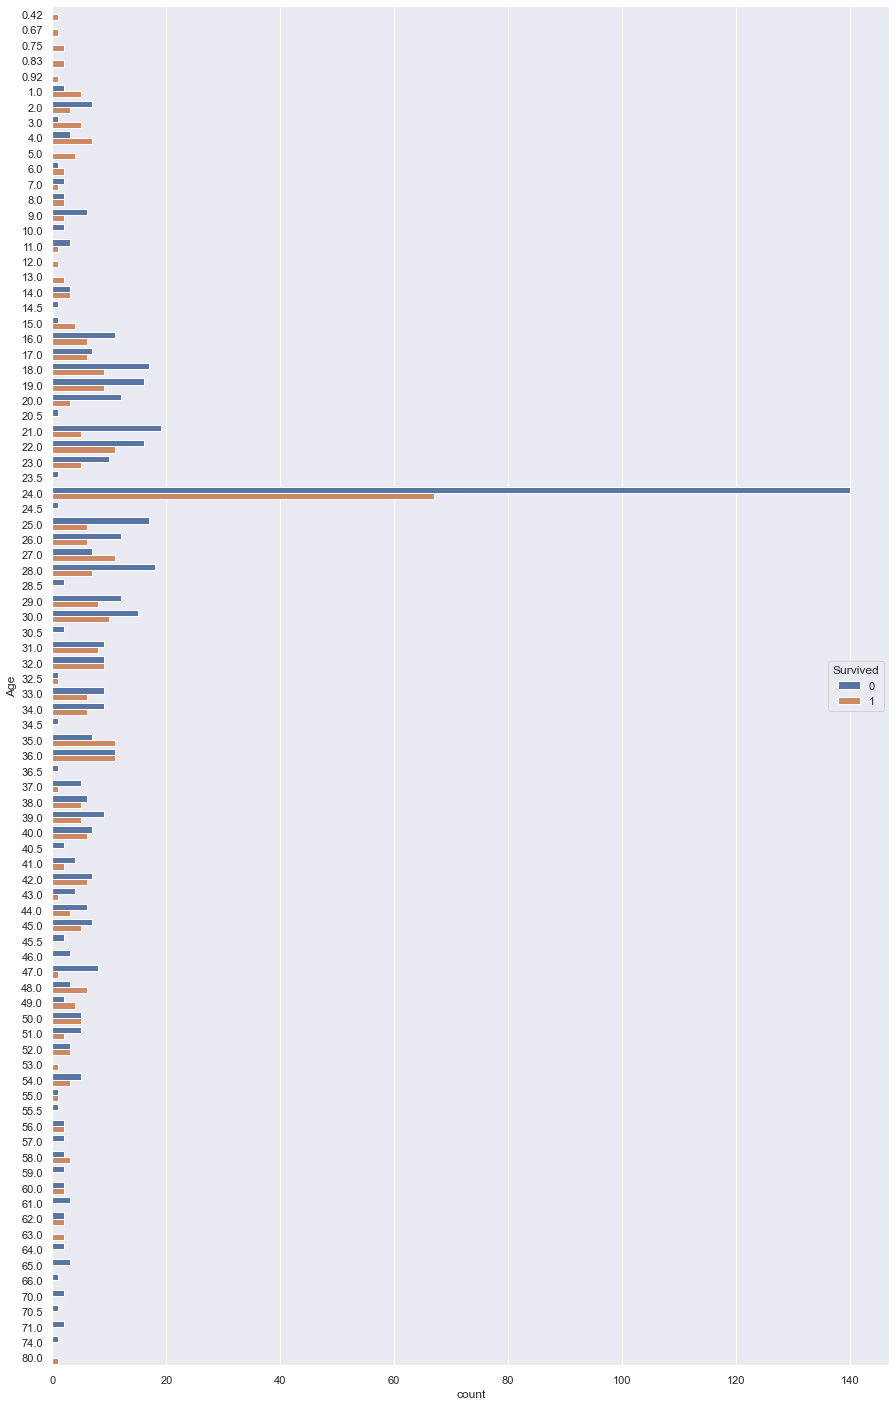

In [16]:
sns.set(rc={'figure.figsize':(15,25)})
sns.countplot(y="Age", hue="Survived", data=data)
plt.show()

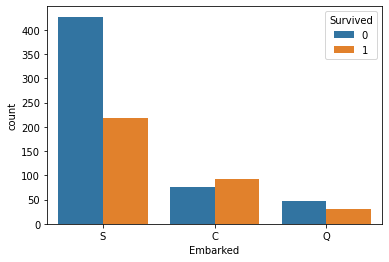

In [10]:
sns.countplot(x="Embarked", hue="Survived", data=data)
plt.show()

In [11]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [12]:
#Сделаем замену категориальных значений на дискретные, используем LabelEncoder и one-hot encoding
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data = pd.get_dummies(data)
data.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
675,0,3,1,18.0,0,0,7.7750,0,0,1
139,0,1,1,24.0,0,0,79.2000,1,0,0
499,0,3,1,24.0,0,0,7.7958,0,0,1
608,1,2,0,22.0,1,2,41.5792,1,0,0
228,0,2,1,18.0,0,0,13.0000,0,0,1
200,0,3,1,28.0,0,0,9.5000,0,0,1
440,1,2,0,45.0,1,1,26.2500,0,0,1
562,0,2,1,28.0,0,0,13.5000,0,0,1
466,0,2,1,24.0,0,0,0.0000,0,0,1
364,0,3,1,24.0,1,0,15.5000,0,1,0


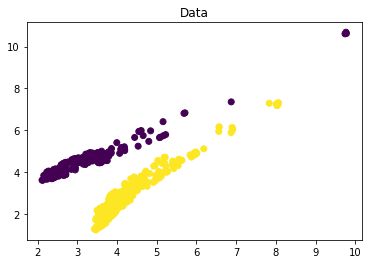

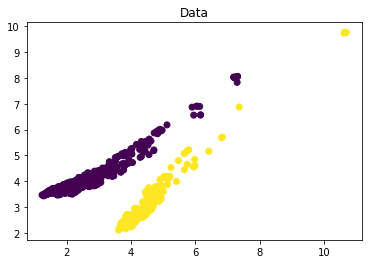

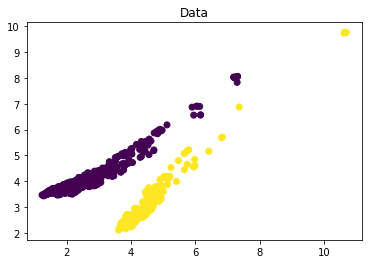

In [13]:
#Кластеризация с помощью алгоритма K-Means и вывод результатов
def kmeans_plot(data, max_iter, tol):
    kmeans = KMeans(n_clusters = 2, max_iter = max_iter, tol = tol)
    data_scaled = StandardScaler().fit_transform(data)
    data_plot = kmeans.fit_transform(data_scaled)
    result = kmeans.labels_
    plt.subplot()
    plt.title('Data')
    plt.scatter(data_plot[:, 0], data_plot[:, 1],c=kmeans.labels_)
    plt.show()

kmeans_plot(data, 100, 0.1)
kmeans_plot(data, 100, 0.01)
kmeans_plot(data, 100, 0.001)

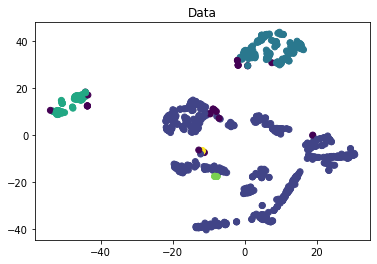

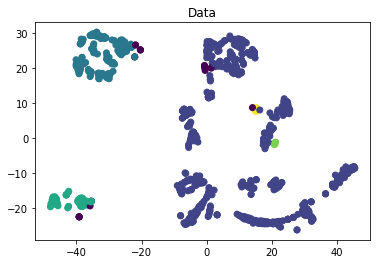

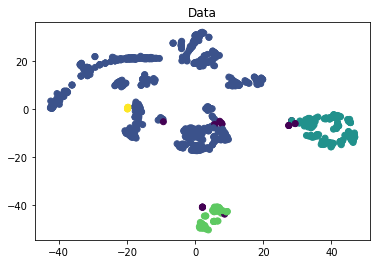

In [14]:
#Кластеризация с помощью алгоритма DBScan и вывод результатов
def DBSCAN_plot(data, radius):
    db = DBSCAN(eps = radius)
    data_scaled = StandardScaler().fit_transform(data)
    tsne = TSNE()
    db.fit(data_scaled)
    result = db.labels_
    data_plot = tsne.fit_transform(data_scaled)
    plt.subplot()
    plt.title('Data')
    plt.scatter(data_plot[:, 0], data_plot[:, 1], c=result)
    plt.show()
DBSCAN_plot(data, 2.1)
DBSCAN_plot(data, 2.2)
DBSCAN_plot(data, 2.3)